In [23]:
from recognition import *

import matplotlib.pyplot as plt
from segmentation import predict
import cv2

from utils.cluster_points import hcluster, mean_cluster
from utils.geometry import angle_between, angle_diff

import numpy as np

from utils.image_manipulation import *

In [24]:
f = cv2.imread('./original.png')
r = cv2.imread('./original-rotated.png')
# print(f.shape)
# print(r.shape)

# plt.imshow(f)
# plt.show()

rotated = np.rot90(f, 3)
# plt.imshow(rotated)
# plt.show()
# plt.imshow(r)

if np.array_equal(rotated, r):
    print('rotation was lossless')

rotation was lossless


original


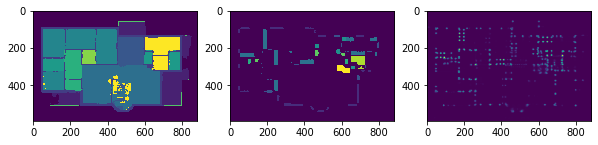

rotated


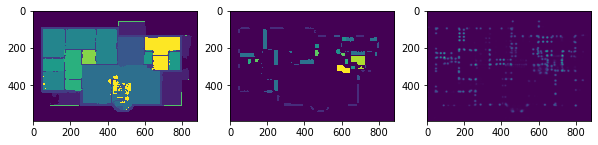

room preds equal: True
icon preds equal: True
heatmaps pred: False
original / rotated


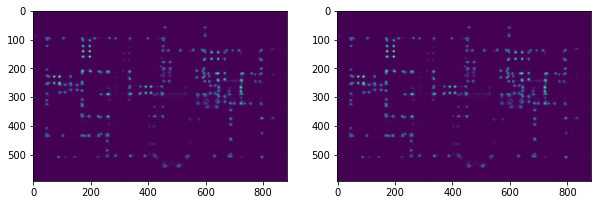

sum of heatmap preds equal: False
positive: in original but not in rotated / negative: in rotated but not in original


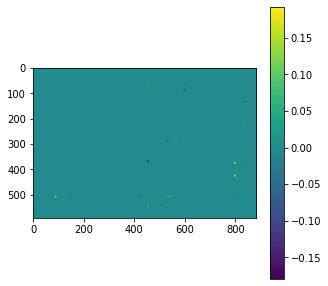

In [25]:
prediction_f = predict(f)
print('original')
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(prediction_f[0], interpolation='none')
ax[1].imshow(prediction_f[1], interpolation='none')
# print(prediction_f[2].shape)
ax[2].imshow(np.sum(prediction_f[2], axis=0), interpolation='none')
plt.show()

prediction_r = predict(r)
print('rotated')
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
rotated_room_pred = np.rot90(prediction_r[0], 1)
rotated_icon_pred = np.rot90(prediction_r[1], 1)
rotated_heatmap_pred = np.rot90(prediction_r[2], 1, (1,2)) # random axis help
ax[0].imshow(rotated_room_pred, interpolation='none')
ax[1].imshow(rotated_icon_pred, interpolation='none')
# print(rotated_heatmap_pred.shape)
ax[2].imshow(np.sum(rotated_heatmap_pred, axis=0))
plt.show()

print('room preds equal:', np.array_equal(rotated_room_pred, prediction_f[0]))
print('icon preds equal:', np.array_equal(rotated_icon_pred, prediction_f[1]))
print('heatmaps pred:', np.array_equal(rotated_heatmap_pred, prediction_f[2]))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
print('original / rotated')
ax[0].imshow(np.sum(prediction_f[2], axis=0), interpolation='none')
ax[1].imshow(np.sum(rotated_heatmap_pred, axis=0), interpolation='none')
plt.show()
print('sum of heatmap preds equal:', np.array_equal(np.sum(rotated_heatmap_pred, axis=0), np.sum(prediction_f[2], axis=0)))

print('positive: in original but not in rotated / negative: in rotated but not in original')
plt.figure(figsize=(5,5))
plt.imshow(np.sum(prediction_f[2], axis=0) - np.sum(rotated_heatmap_pred, axis=0), interpolation='none')
plt.colorbar()
pass

# irrelevant because they are expected to be different
# for i in range(prediction_f[2].shape[0]):
#     rotated_heatmap = np.rot90(prediction_r[2][i], 1)
#     fig, ax = plt.subplots(1, 2, figsize=(10, 10))
#     ax[0].imshow(rotated_heatmap, interpolation='none')
#     ax[1].imshow(prediction_f[2][i], interpolation='none')
#     plt.show()
#     print(f'{i}: {np.array_equal(rotated_heatmap, prediction_f[2][i])}')

(44, 592, 883)
(44, 883, 592)
(44, 592, 883)


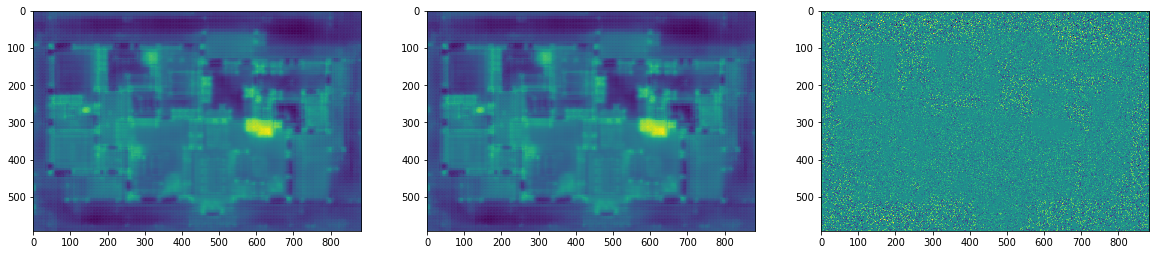

In [23]:
# ONLY WITH SEGMENTATION MODIFIED TO RETURN EARLY

prediction_f = predict(f).cpu().squeeze().numpy()
prediction_r = predict(r).cpu().squeeze().numpy()
rotated_pred = np.rot90(prediction_r, 1, (1,2))
print(prediction_f.shape)
print(prediction_r.shape)
print(rotated_pred.shape)
np.array_equal(rotated_pred[-1], prediction_f[-1])
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(rotated_pred[-1], interpolation='none')
ax[1].imshow(prediction_f[-1], interpolation='none')
ax[2].imshow(prediction_f[-1] - rotated_pred[-1], interpolation='none')

In [26]:
import segmentation
import torch

def for_network(image):
    image = torch.from_numpy(np.moveaxis(image, 2, 0).reshape(1, 3, image.shape[0], image.shape[1]))
    image = ((image / 255) * 2 - 1).float().cuda()
    return image

with torch.no_grad():
    pred1 = segmentation.model(for_network(r)).cpu()
    pred2 = segmentation.model(for_network(rotated.copy())).cpu()
    print(torch.equal(pred1, pred2))

True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


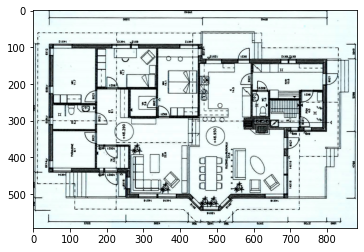

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


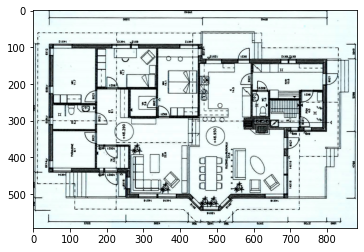

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True


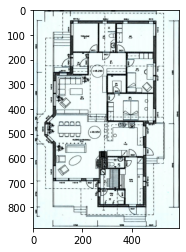

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


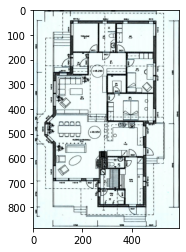

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True


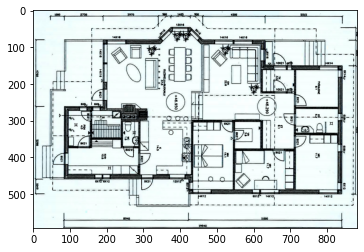

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


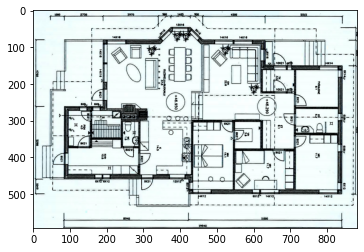

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True


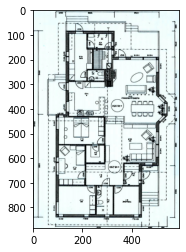

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


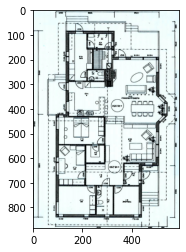

True


In [48]:
rot = segmentation.RotateNTurns()

with torch.no_grad():
    original = for_network(f)
    rotated_original = rot(original, 'tensor', 0)
    plt.imshow(original[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    plt.imshow(rotated_original[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    pred1 = segmentation.model(original).cpu()
    pred2 = segmentation.model(rotated_original).cpu()
    print(torch.equal(pred1, pred2))

    rotated = np.rot90(f, 3).copy()
    network_r = for_network(rotated)
    rotated_original = rot(original, 'tensor', 1)
    plt.imshow(network_r[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    plt.imshow(rotated_original[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    pred1 = segmentation.model(network_r).cpu()
    pred2 = segmentation.model(rotated_original).cpu()
    print(torch.equal(pred1, pred2))

    rotated = np.rot90(f, 2).copy()
    network_r = for_network(rotated)
    rotated_original = rot(original, 'tensor', 2)
    plt.imshow(network_r[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    plt.imshow(rotated_original[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    pred1 = segmentation.model(network_r).cpu()
    pred2 = segmentation.model(rotated_original).cpu()
    print(torch.equal(pred1, pred2))

    rotated = np.rot90(f, 1).copy()
    network_r = for_network(rotated)
    rotated_original = rot(original, 'tensor', -1)
    plt.imshow(network_r[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    plt.imshow(rotated_original[0].cpu().numpy().transpose(1, 2, 0))
    plt.show()
    pred1 = segmentation.model(network_r).cpu()
    pred2 = segmentation.model(rotated_original).cpu()
    print(torch.equal(pred1, pred2))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


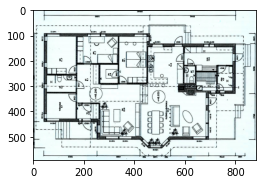

input sum 1296223.375
input shape torch.Size([1, 3, 592, 883])


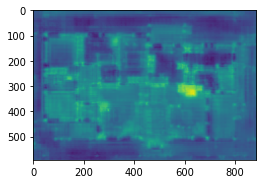

before rot back -7517067.0
before inter -7517067.0
after inter -7507782.5
input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


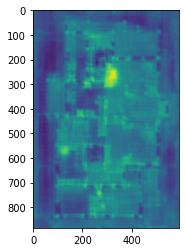

before rot back -7712339.5
before inter -7712339.5
after inter -7703616.5
input sum 1296223.5
input shape torch.Size([1, 3, 592, 883])


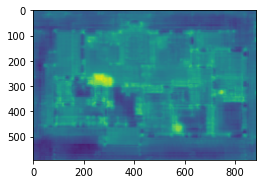

before rot back -7605115.0
before inter -7605114.5
after inter -7597391.0
input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


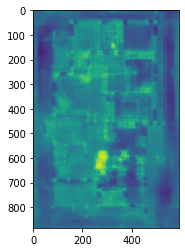

before rot back -7555022.0
before inter -7555022.0
after inter -7546477.0


In [132]:
import torch.nn.functional as F

rot = segmentation.RotateNTurns()
image = for_network(f)
plt.figure(figsize=(4,4))
plt.imshow(image[0].cpu().numpy().transpose(1, 2, 0))
plt.show()

with torch.no_grad():
    height = image.shape[2]
    width = image.shape[3]

    rotations = [(0, 0), (1, -1), (2, 2), (-1, 1)]
    pred_count = len(rotations)
    prediction = torch.zeros([pred_count, segmentation.n_classes, height, width])
    for i, rotation in enumerate(rotations):
        forward, back = rotation
        # We rotate first the image
        # rot_image = rot(image, 'tensor', forward)
        rot_image = torch.rot90(image, i, (2,3))
        print('input sum', rot_image.sum().item())
        print('input shape', rot_image.shape)
        pred = segmentation.model(rot_image)
        plt.figure(figsize=(4,4))
        plt.imshow(pred[0,-1,:,:].cpu().numpy())
        plt.show()
        # We rotate prediction back
        print('before rot back', pred[0][-1].sum().item())
        pred = torch.rot90(pred, 3, (2,3))
        # pred = rot(pred, 'tensor', back)
        # We fix heatmaps
        # pred = rot(pred, 'points', back)
        # We make sure the size is correct
        print('before inter', pred[0][-1].sum().item())
        pred = F.interpolate(pred, size=(height, width), mode='bilinear', align_corners=True)
        print('after inter', pred[0][-1].sum().item())
        print('='*10)
        # We add the prediction to output
        prediction[i] = pred[0]

    prediction = torch.mean(prediction, 0, True)

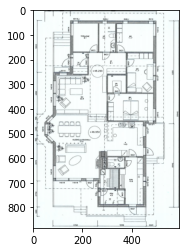

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


are images equal? False


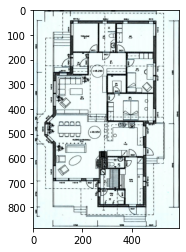

input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


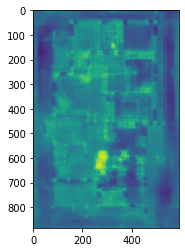

before rot back -7555022.0
before inter -7555022.0
after inter -7547603.0
equal predictions? False
equal total predictions? True
input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


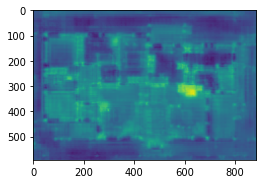

before rot back -7517067.0
before inter -7517067.0
after inter -7508564.5
equal predictions? False
equal total predictions? True
input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


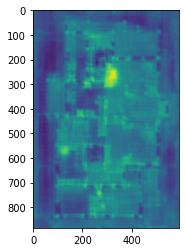

before rot back -7712339.5
before inter -7712339.5
after inter -7703820.0
equal predictions? False
equal total predictions? True
input sum 1296223.5
input shape torch.Size([1, 3, 883, 592])


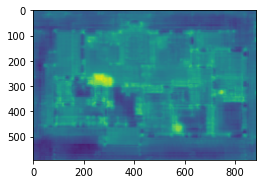

before rot back -7605115.0
before inter -7605114.5
after inter -7596513.5
equal predictions? False
equal total predictions? True
equal mean predictions? True


In [134]:
import torch.nn.functional as F

# rot = segmentation.RotateNTurns()
plt.imshow(r)
plt.show()
image2 = for_network(r)
# image2 = torch.rot90(image2, 1, (2,3))
print('are images equal?', torch.equal(image, image2))
plt.figure(figsize=(4,4))
plt.imshow(image2[0].cpu().numpy().transpose(1, 2, 0))
plt.show()

with torch.no_grad():
    height = image2.shape[2]
    width = image2.shape[3]

    rotations = [(0, 0), (1, -1), (2, 2), (-1, 1)]
    pred_count = len(rotations)
    prediction_rot = torch.zeros([pred_count, segmentation.n_classes, height, width])
    for i, rotation in enumerate(rotations):
        forward, back = rotation
        # We rotate first the image
        # rot_image = rot(image, 'tensor', forward)
        rot_image_rot = torch.rot90(image2, i, (2,3))
        # print('rotated images equal?', torch.equal(rot_image_rot, rot_image))
        print('input sum', rot_image.sum().item())
        print('input shape', rot_image.shape)
        pred_rot = segmentation.model(rot_image_rot)
        plt.figure(figsize=(4,4))
        plt.imshow(pred_rot[0,-1,:,:].cpu().numpy())
        plt.show()
        # We rotate prediction back
        print('before rot back', pred_rot[0][-1].sum().item())
        pred_rot = torch.rot90(pred_rot, 3, (2,3))
        # pred = rot(pred, 'tensor', back)
        # We fix heatmaps
        # pred = rot(pred, 'points', back)
        # We make sure the size is correct
        print('before inter', pred_rot[0][-1].sum().item())
        pred_rot = F.interpolate(pred_rot, size=(height, width), mode='bilinear', align_corners=True)
        print('after inter', pred_rot[0][-1].sum().item())
        print('='*10)
        print('equal predictions?', torch.equal(pred, pred_rot))
        # We add the prediction to output
        prediction_rot[i] = pred_rot[0]
        print('equal total predictions?', torch.equal(prediction_rot, prediction_rot))

    prediction_rot = torch.mean(prediction_rot, 0, True)
    print('equal mean predictions?', torch.equal(prediction_rot, prediction_rot))

In [65]:
torch.equal(prediction_rot[0, -1, :, :], prediction_rot[0, -1, :, :])

False